In [198]:
### Relative abundance Analysis: 
from Bio import SeqIO
import pandas as pd
import pysam
import os
FILE_ID = ["M315-I4728-18955","M318-I4747-18975","M522_I6768_27738",
           "M595_I7606_7544","M595_I7616_7589","M596_I7627_10569",
           "M636_I8104_7576","M642_I8175_7616","M524_I6792_27767",
           "M524_I6790_27765","M642_I8174_7610"]
# FILE_ID = ["M315-I4728-18955","M318-I4747-18975","M522_I6768_27738"]
# FILE_ID = ["M595_I7606_7544","M595_I7616_7589","M596_I7627_10569"]
# FILE_ID = ["M636_I8104_7576","M642_I8175_7616","M524_I6792_27767"]
# FILE_ID = ["M524_I6790_27765","M524_I6792_27767"]

def find_bamfiles(folder_path):       
    file_list = []
    for ID in FILE_ID:
        for filename in os.listdir(folder_path):
            if filename.startswith(ID):
                if filename.endswith(".bam"):
                    file_list.append(os.path.join(folder_path, filename))
    return file_list

def find_Library_Size(Library_size_matrix):
    data_frame = pd.read_csv(Library_size_matrix, sep='\t')
    Identification = data_frame.iloc[:,0]
    
    id_list = []
    for ID_front in FILE_ID:
        for ID in Identification:
            if ID.startswith(ID_front):
                id_list.append(ID)
                
    size_dict = {}
    for id_value in id_list:
        try:
            Library_Size = data_frame.loc[data_frame['Sample_name'] == id_value, 'Libary_Size'].values[0]
            size_dict[id_value] = Library_Size
        except IndexError:
            print(f"ID '{id_value}' not found in the table.")
            return None
    return size_dict

def find_contigs(filepaths):
    contigs = []
    for record in SeqIO.parse(filepaths, "fasta"):
        contigs.append(record.id) 
    return contigs

def find_relative_abundance(file_lists, folder_path):
    Dict_Sample_ID = find_Library_Size("PHAGE_BUBBLE/sampleSeqCounts.tsv")
    contigs = find_contigs("PHAGE_BUBBLE/Paths/combineS2/Comp_59_big.fasta")
    mapped_reads_count = 0
    genome_length = 0
    dict_data = {}
    for ID in FILE_ID:
        # print(f"Evaluating {ID}")
        for files in file_lists:
            if files.startswith(f"{folder_path}/{ID}"):
                with pysam.AlignmentFile(files, 'rb') as bamfile:                  
                    for paths in contigs:
                        for references in bamfile.references:
                            mapped_reads = bamfile.count(reference = paths, 
                                                         read_callback=lambda read: not read.is_unmapped)
                            mapped_reads_count += mapped_reads
                            genome_length += bamfile.get_reference_length(references)
                        # print(mapped_reads_count)
                        # print(genome_length)
                        for id_value, library_size in Dict_Sample_ID.items():
                            if ID in id_value:
                                Library_Size = library_size
                                # print(f"The library size is {library_size}")
                        # Calculating Relative Abundance: 
                        Rel_Ab = (mapped_reads_count * 10^6)/(library_size * genome_length)
                        # print(f"Relative Abundance of {paths}:", Rel_Ab)
                        mapped_reads_count = 0
                        genome_length = 0
                        
                        if ID not in dict_data:
                            dict_data[ID] = {}
                        dict_data[ID][f"Paths {paths}"] = Rel_Ab
    return dict_data
    # print(dict_data)
content = find_bamfiles("PHAGE_BUBBLE/Bam_sorted/BothPaths_comp_59")
Dict_Relative_Abundance = find_relative_abundance(content,"PHAGE_BUBBLE/Bam_sorted/BothPaths_comp_59")
print(Dict_Relative_Abundance)

{'M315-I4728-18955': {'Paths phage_comp_59_cycle_1': 3.1188723239860634e-10, 'Paths phage_comp_59_cycle_2': 1.1400016080776646e-09, 'Paths phage_comp_59_cycle_3': 3.1188723239860634e-10}, 'M318-I4747-18975': {'Paths phage_comp_59_cycle_1': 3.226419645502824e-11, 'Paths phage_comp_59_cycle_2': 1.2905678582011297e-10, 'Paths phage_comp_59_cycle_3': 1.2905678582011297e-10}, 'M522_I6768_27738': {'Paths phage_comp_59_cycle_1': 3.226419645502824e-11, 'Paths phage_comp_59_cycle_2': 3.226419645502824e-11, 'Paths phage_comp_59_cycle_3': 3.226419645502824e-11}, 'M595_I7606_7544': {'Paths phage_comp_59_cycle_1': 3.2793329276890705e-07, 'Paths phage_comp_59_cycle_2': 3.2424441964088216e-07, 'Paths phage_comp_59_cycle_3': 3.5669144654248887e-07}, 'M595_I7616_7589': {'Paths phage_comp_59_cycle_1': 7.018538202183811e-08, 'Paths phage_comp_59_cycle_2': 7.322897122076244e-08, 'Paths phage_comp_59_cycle_3': 7.94021874758245e-08}, 'M596_I7627_10569': {'Paths phage_comp_59_cycle_1': 3.100589279328214e-08,

['Paths phage_comp_59_cycle_1', 'Paths phage_comp_59_cycle_2', 'Paths phage_comp_59_cycle_3']
['M315-I4728-18955', 'M318-I4747-18975', 'M522_I6768_27738', 'M595_I7606_7544', 'M595_I7616_7589', 'M596_I7627_10569', 'M636_I8104_7576', 'M642_I8175_7616', 'M524_I6792_27767', 'M524_I6790_27765']
[[3.1188723239860634e-10, 1.1400016080776646e-09, 3.1188723239860634e-10], [3.226419645502824e-11, 1.2905678582011297e-10, 1.2905678582011297e-10], [3.226419645502824e-11, 3.226419645502824e-11, 3.226419645502824e-11], [3.2793329276890705e-07, 3.2424441964088216e-07, 3.5669144654248887e-07], [7.018538202183811e-08, 7.322897122076244e-08, 7.94021874758245e-08], [3.100589279328214e-08, 3.3221367616527414e-08, 2.8059096183722896e-08], [4.576353625181206e-07, 4.594744217160572e-07, 4.6086178216362344e-07], [6.660620716176031e-07, 6.943577719086628e-07, 7.101242092430199e-07], [3.1188723239860634e-10, 3.1188723239860634e-10, 3.1188723239860634e-10], [1.2905678582011297e-10, 3.226419645502824e-11, 3.118872

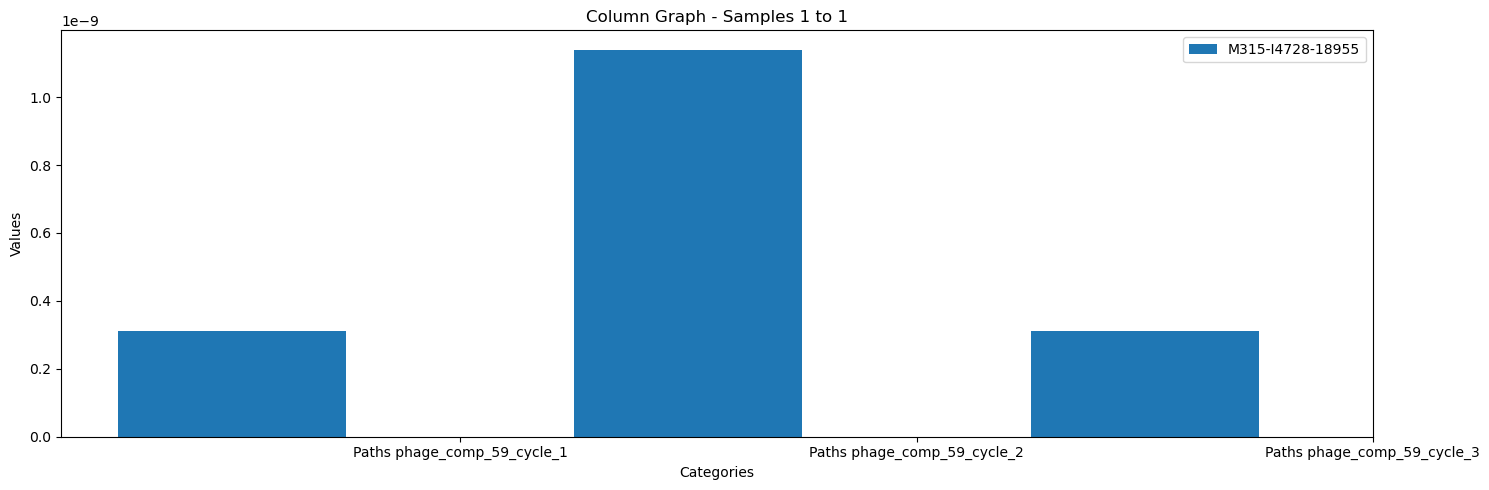

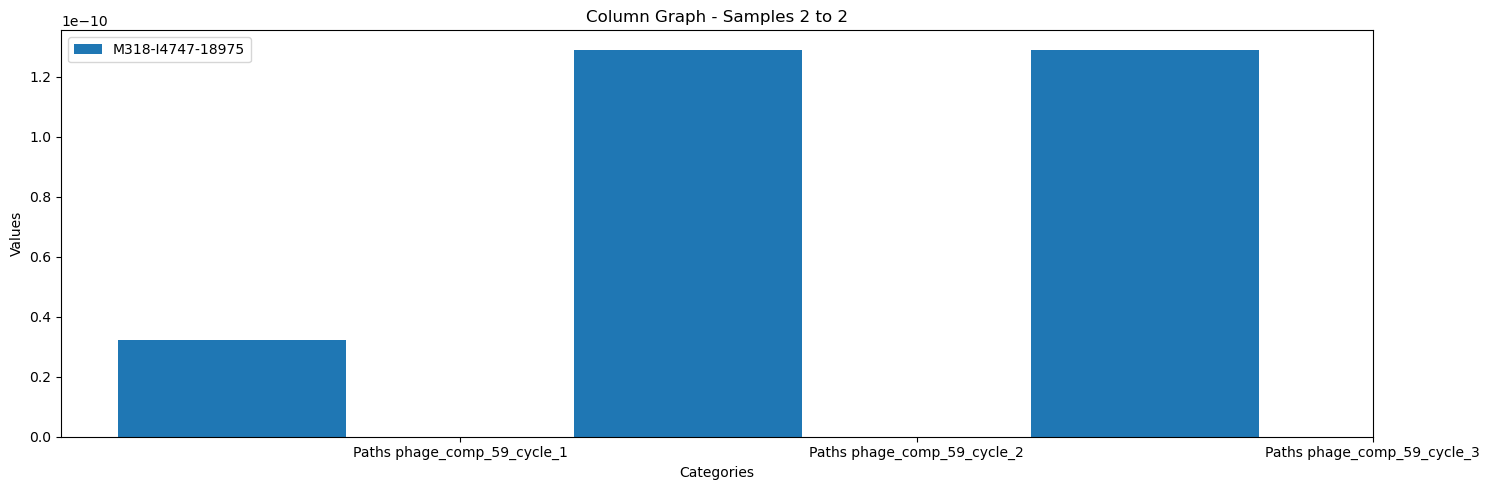

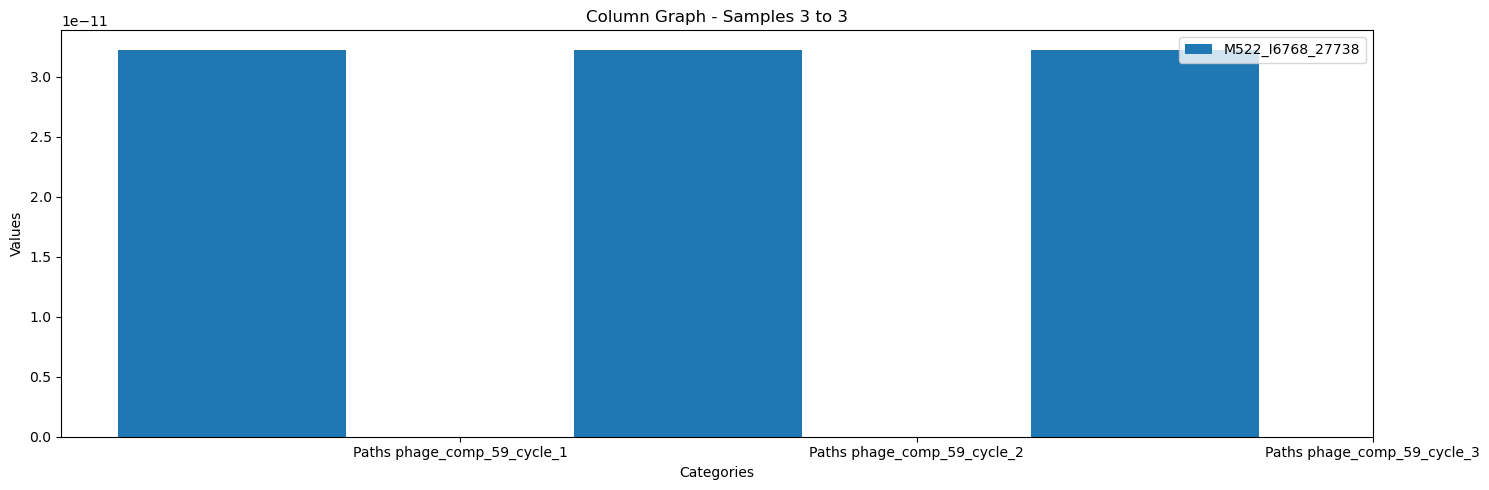

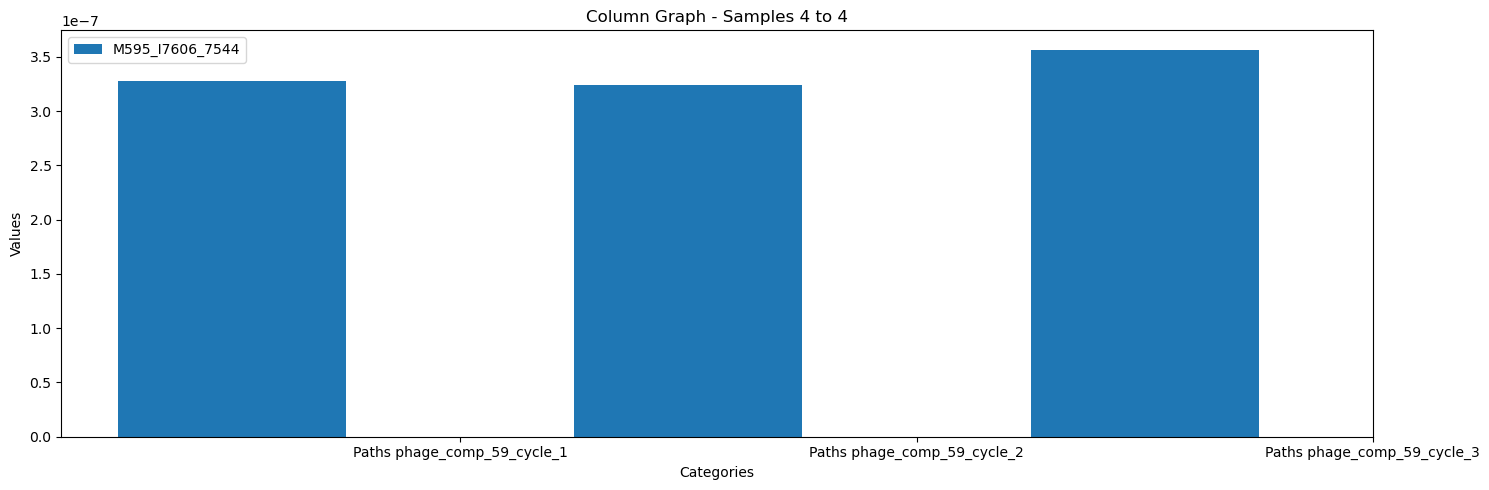

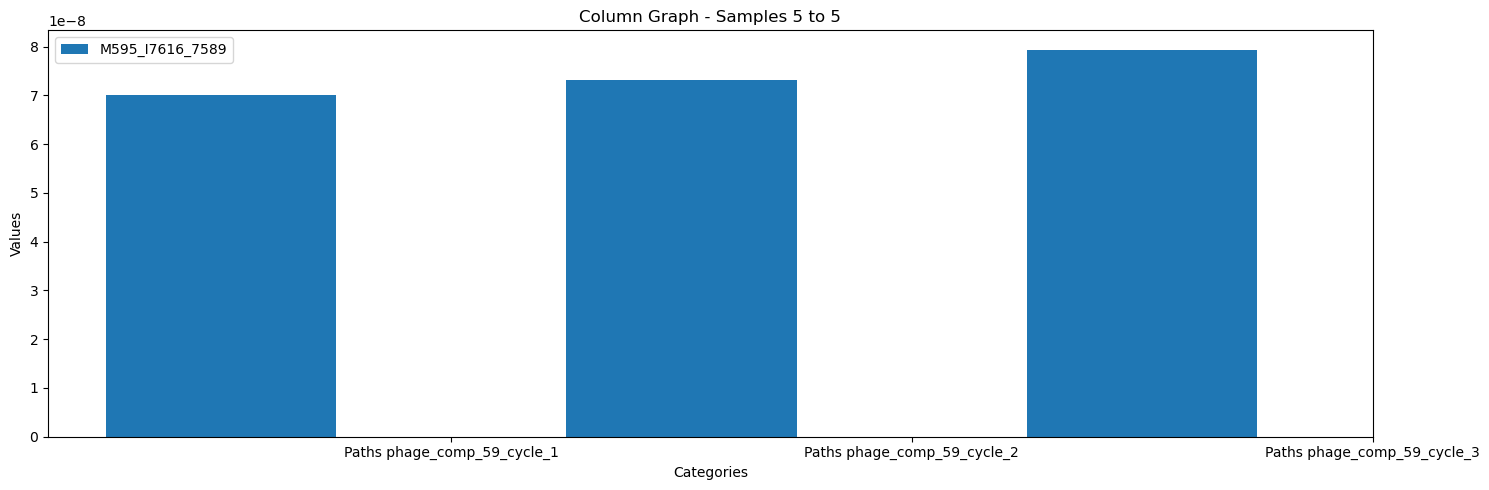

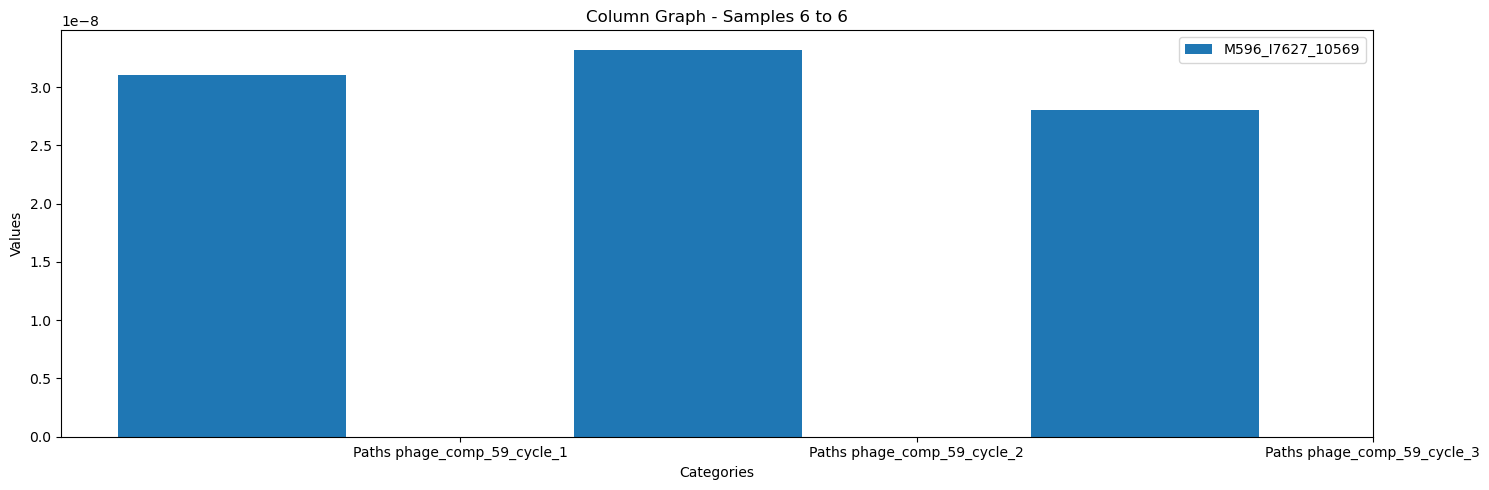

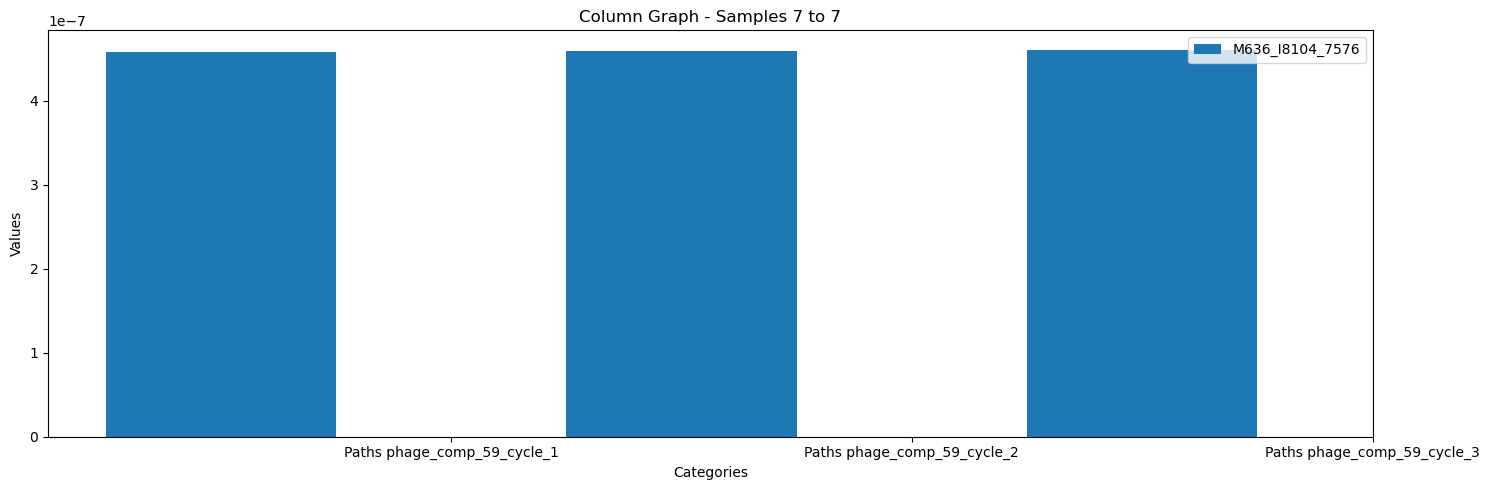

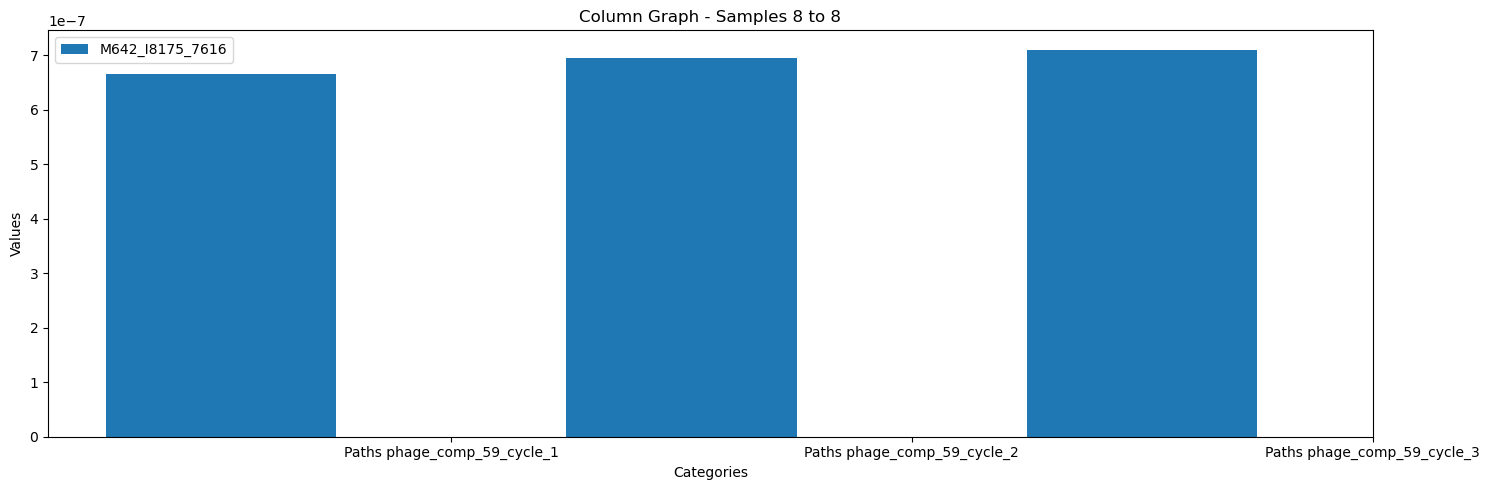

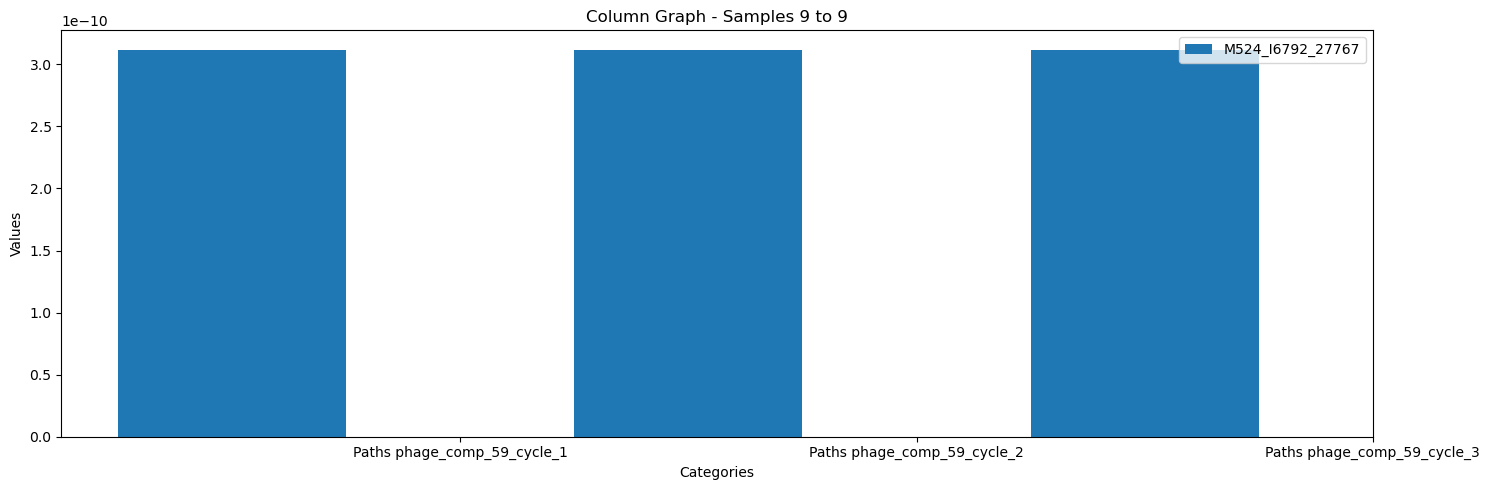

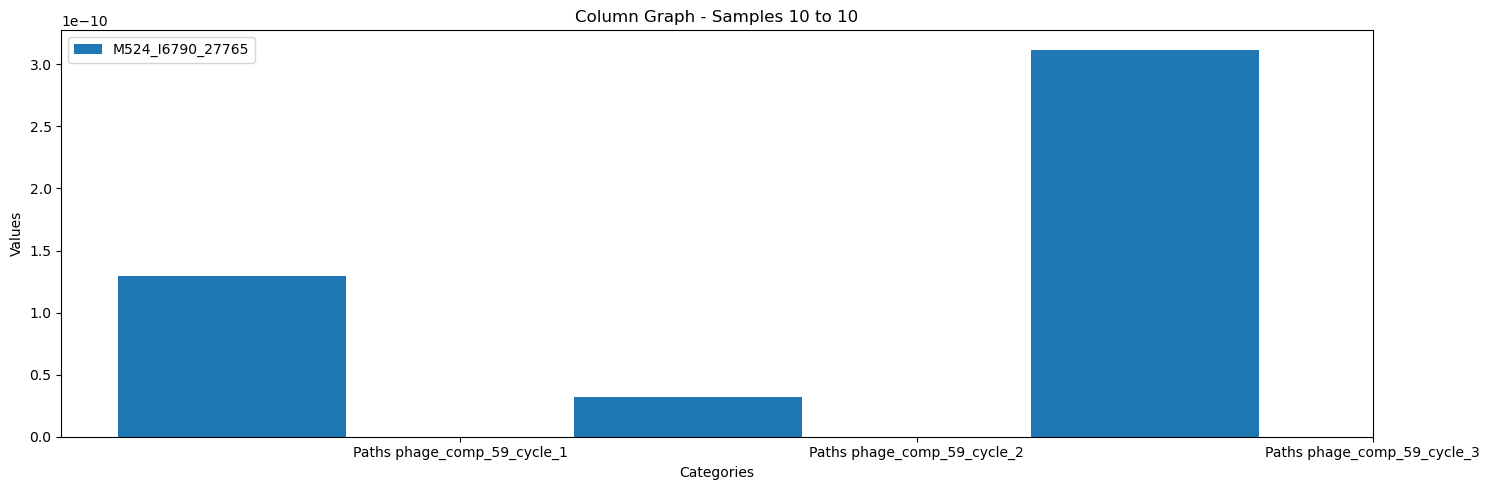

In [11]:
### Graphing the Relative Abundance:
import matplotlib.pyplot as plt
FILE_ID = ["M315-I4728-18955","M318-I4747-18975","M522_I6768_27738",
           "M595_I7606_7544","M595_I7616_7589","M596_I7627_10569",
           "M636_I8104_7576","M642_I8175_7616","M524_I6792_27767",
           "M524_I6790_27765"]

data = Dict_Relative_Abundance

Paths_ID = list(data["M315-I4728-18955"].keys())
Samples = list(data.keys())
data_values = [list(d.values()) for d in data.values()]

print(Paths_ID)
print(Samples)
print(data_values)


samples_per_graph = 1

for i in range(0, len(Samples), samples_per_graph):
    fig, ax = plt.subplots(figsize=(15,5))
    width = 0.5
    for j in range(samples_per_graph):
        sample_index = i + j
        if sample_index >= len(Samples):
            break
        x = [k + j * width for k in range(len(Paths_ID))]
        ax.bar(x, data_values[sample_index], width, label = Samples[sample_index])

    ax.set_xticks([k + width * (3 - 1) / 2 for k in range(len(Paths_ID))])
    ax.set_xticklabels(Paths_ID) 
    ax.set_xlabel('Categories')
    ax.set_ylabel('Values')
    ax.set_title(f'Column Graph - Samples {i+1} to {i+samples_per_graph}')
    ax.legend()
    plt.tight_layout()
    plt.show()

In [203]:
# Finding the list of samples metagenomic files (fastaq):
# A function that can read metadata: PHAGE_BUBBLE/Freeze3_metadata.csv
import pandas as pd

def find_files_in_metadata(metafile_location, sample_ID):
    column_name = 'seqID_virome'   
    ALL_file_name = pd.read_csv(metafile_location, usecols=[column_name], header=0,
                             dtype=str, na_values=['NA'],
                             converters={column_name: str},
                             skip_blank_lines=True,
                             true_values=['true'], false_values=['false'],
                             nrows=None)
    
    Filtered_Sample_ID = ALL_file_name[ALL_file_name[column_name].str.startswith(sample_ID)] # use tuple(list) for getting more sample ID
    Sample_ID_list = Filtered_Sample_ID[column_name].tolist()
    print(Sample_ID_list)
    
    
    output_file_path = f'Time_series/{sample_ID}_sample_output.txt'

# Write the list of filenames to the output text file
    with open(output_file_path, 'w') as file:
        for item in Sample_ID_list:
            file.write("%s\n" % item)
    print("File list exported to", output_file_path)
    
    
find_files_in_metadata("PHAGE_BUBBLE/Freeze3_metadata.csv", "M595")

['M595_I7606_7544_Parkes_IBD_030-1_NEBNextIndex17_GTAGAG_S1_L001', 'M595_I7607_7547_Parkes_IBD_031-2_NEBNextIndex24_GGTAGC_S2_L001', 'M595_I7608_7550_Parkes_IBD_033-1_NEBNextIndex26_ATGAGC_S3_L001', 'M595_I7609_7553_Parkes_IBD_034-2_NEBNextIndex28_CAAAAG_S4_L001', 'M595_I7610_7554_Parkes_IBD_035-1_NEBNextIndex29_CAACTA_S5_L001', 'M595_I7611_7556_Parkes_IBD_036-1_NEBNextIndex31_CACGAT_S6_L001', 'M595_I7612_7561_Parkes_IBD_038-2_NEBNextIndex32_CACTCA_S7_L001', 'M595_I7613_7562_Parkes_IBD_039-1_NEBNextIndex33_CAGGCG_S8_L001', 'M595_I7614_7564_Parkes_IBD_040-2_NEBNextIndex34_CATGGC_S9_L001', 'M595_I7615_7578_Parkes_IBD_045-2_NEBNextIndex35_CATTTT_S10_L001', 'M595_I7616_7589_Parkes_IBD_30_NEBNextIndex36_CCAACA_S11_L001', 'M595_I7617_7605_Parkes_IBD_39_NEBNextIndex42_TAATCG_S12_L001']
File list exported to Time_series/M595_sample_output.txt


/home/pham0323/miniconda3/envs/minimap2/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Both a converter and dtype were specified for column seqID_virome - only the converter will be used
  return func(*args, **kwargs)


In [57]:
import pandas as pd

data_frame = pd.read_csv("PHAGE_BUBBLE/Freeze3_metadata.csv")

Patient_ID = data_frame.groupby(["patient_ID"])["patient_ID"].count()
dict_1 = Patient_ID.to_dict()

dict_1_sorted = sorted(dict_1.items(), key=lambda x:x[1], reverse=True)


# for ID in Patient_ID.index: 
#     print(ID, Patient_ID.loc[ID])
    
dict_1_sorted

[('230_4', 25),
 ('282', 21),
 ('1012A', 15),
 ('2093A', 15),
 ('2028A', 13),
 ('2037A', 13),
 ('2064A', 13),
 ('2065A', 13),
 ('228', 13),
 ('203', 12),
 ('2036A', 12),
 ('2032A', 11),
 ('2056A', 11),
 ('2057A', 11),
 ('2066A', 11),
 ('234', 10),
 ('268', 10),
 ('105', 9),
 ('106', 9),
 ('2053A', 9),
 ('2067A', 9),
 ('2059A', 8),
 ('2074A', 8),
 ('2092A', 8),
 ('2099A', 8),
 ('2107A', 8),
 ('2117A', 8),
 ('2124A', 8),
 ('267', 8),
 ('278', 8),
 ('287', 8),
 ('2071A', 7),
 ('2118A', 7),
 ('257_2', 7),
 ('275', 7),
 ('283', 7),
 ('303', 7),
 ('32', 7),
 ('1008A', 6),
 ('2022A', 6),
 ('2034A', 6),
 ('2042A', 6),
 ('2073A', 6),
 ('2114A', 6),
 ('276_1', 6),
 ('30', 6),
 ('304', 6),
 ('305', 6),
 ('307', 6),
 ('38', 6),
 ('58', 6),
 ('1001A', 5),
 ('1002A', 5),
 ('1003A', 5),
 ('201', 5),
 ('2022B', 5),
 ('2133A', 5),
 ('279', 5),
 ('288', 5),
 ('291', 5),
 ('292', 5),
 ('1007A', 4),
 ('184', 4),
 ('2027A', 4),
 ('2029A', 4),
 ('2044A', 4),
 ('2070A', 4),
 ('2105A', 4),
 ('235', 4),
 ('258

In [225]:
import pandas as pd

patient_ID_list =['230_4','282','1012A','2093A','2028A','2037A','2064A','2065A','228','203','2036A','2032A','2056A','2057A','2066A','234','268']


def Find_patient_information(patient_ID):
    
    patient_information = ["patient_ID","patient_type","IBD","day","month","year","seqID_virome"] 
    data_frame = pd.read_csv("PHAGE_BUBBLE/Freeze3_metadata.csv", header=0,
                             dtype=str, na_values=['NA'],
                             skip_blank_lines=True,
                             true_values=['true'], false_values=['false'],
                             nrows=None)
        
    patient_ID_whole_metadata = data_frame[data_frame["patient_ID"] == patient_ID]
    selected_data = patient_ID_whole_metadata[patient_information]
    selected_data['Time'] = selected_data.apply(lambda row:'-'.join(row[["day","month","year"]]), axis=1)
    selected_data.drop(columns=["day","month","year"], inplace=True)
    # print(selected_data)

    Time_list = [time for time in selected_data["Time"]]
    File_loc_list = [loc for loc in selected_data["seqID_virome"]]
    Dict_1 = {f"Sample no.{i}":{"Filename": file, "Time": time} for i, (file, time) in enumerate(zip(File_loc_list, Time_list))}
    Dict_1_cleaned = {file: time for file, time in Dict_1.items() if all(not pd.isna(v) for v in time.values())} # look for value that are not nan -> append it to the 
    return Dict_1_cleaned

def write_output_for_Bash_command(File_name, Column):
    output_file_path = 'Time_series/sample_output.txt'
    with open(output_file_path, 'w') as file:
        for item in File_name[Column]:
            file.write("%s\n" % item)
    
Find_patient_information("282")

/home/pham0323/miniconda3/envs/minimap2/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/pham0323/miniconda3/envs/minimap2/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


{'Sample no.0': {'Filename': 'M314-I4720-18945-Miles-Parkes-IBD-c4-282-v2-NEBNextIndex27-ATTCCTTTAT_S12_L001',
  'Time': '11-5-2016'},
 'Sample no.1': {'Filename': 'M316-I4741-18968-Miles-Parkes-IBD-a3-282-v3-NEBNext-Index-25-ACTGATATATCTC_S11_L001',
  'Time': '14-6-2016'},
 'Sample no.2': {'Filename': 'M319-I4764-18992-Miles-Parkes-IBD-c3-282-v4-NEBNextIndex25-ACTGATATATCTC_S11_L001',
  'Time': '11-7-2016'},
 'Sample no.3': {'Filename': 'M321-I4776-19020-Miles-Parkes-IBD-b3-282-v5-NEBNextIndex14-AGTTCCGTAT_S1_L001',
  'Time': '30-8-2016'},
 'Sample no.4': {'Filename': 'M327-I4867-19037-Miles-Parkes-IBD-c1-282-v5-NEBNextIndex20-GTGGCCTTAT_S7_L001',
  'Time': '27-6-2016'},
 'Sample no.5': {'Filename': 'M306-I4602-19094-Miles-Parkes-d7-282-v1-NEBNextIndex8-ACTTGAATCT_S11_L001',
  'Time': '12-4-2016'},
 'Sample no.6': {'Filename': 'M523_I6776_27718_Parkes_IBD_VIR282_I_26_01_17_NEBNextIndex8_ACTTGA_S7_L001',
  'Time': '26-1-2017'},
 'Sample no.7': {'Filename': 'M523_I6777_27719_Parkes_IBD_

In [147]:
data_dict = {}
# Loop through the rows and create dictionary entries
for row in selected_data:
    entry = {
        'ID': row[0],
        'Type': row[1],
        'IBD': row[2],
        'Time': row[3]
    }
    data_dict[row[0]] = entry

# Display the resulting dictionary
print(data_dict)


{'a': {'ID': 'p', 'Type': 'a', 'IBD': 't'}, 'o': {'ID': 'm', 'Type': 'o', 'IBD': 'n'}, 'B': {'ID': 'I', 'Type': 'B', 'IBD': 'D'}, 'e': {'ID': 's', 'Type': 'e', 'IBD': 'q'}}


               Value
2023-01-01 -0.457950
2023-01-02  0.113879
2023-01-03 -0.239537
2023-01-04  0.409389
2023-01-05 -1.102012
...              ...
2023-12-27  0.748287
2023-12-28 -0.239223
2023-12-29 -1.017977
2023-12-30  0.364653
2023-12-31  0.023542

[365 rows x 1 columns]


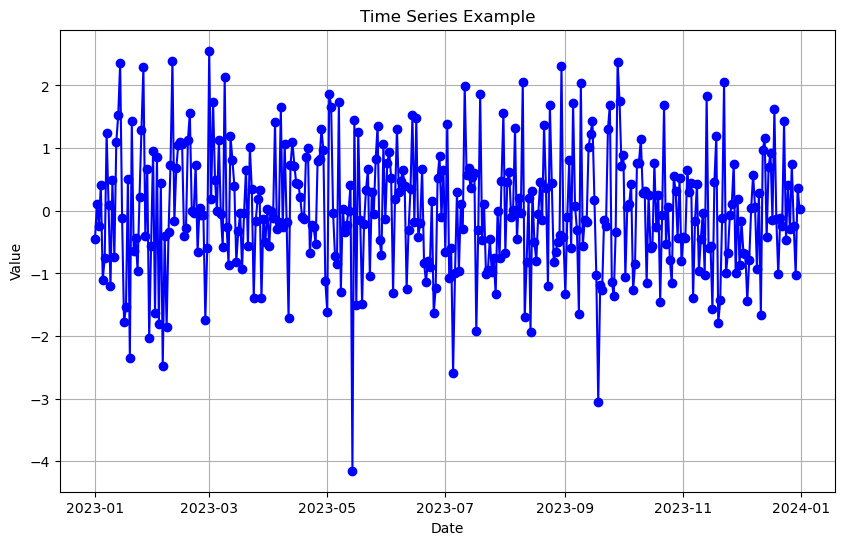

In [70]:
import pandas as pd

# Create a date range
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Create a DataFrame with the date range as the index
time_series = pd.DataFrame(index=date_range)

# Display the time series
# print(time_series)

# Add a column of random data to the time series
import numpy as np
time_series['Value'] = np.random.randn(len(time_series))

# Display the updated time series
print(time_series)

import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series['Value'], marker='o', linestyle='-', color='b')
plt.title('Time Series Example')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [59]:
dict_2 = {1: {"a": 2, "b": 3}, 2: {"a": 4, "b": 6}}

a = [dict_2[x]["a"] for x in dict_2.keys()]
a

[2, 4]